# NLP-Assignment-1

©Souvik Roy
18210083

1. Download Tom Sawyer text dataset.
2. Compute tokens, types, and TTR. 
3. Plot Zipf’s law
4. Plot Heaps’ law. Fit a curve and report the estimated K and β values.


Total Tokens Count: 76789
Total Type Count: 8298
TTR: 0.108


Plotting frequencies of most used top 15 words:


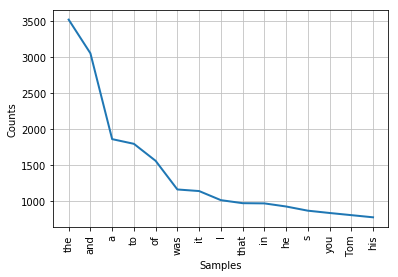

In [24]:
import nltk
import re

file_content = open("TSDataset.txt", 'r',encoding='utf8')
fl= file_content.read()
tok = nltk.word_tokenize(fl)
words = [w.lower() for w in tok]
words = re.findall(r'(\b[A-Za-z][a-z]{0,200}\b)', fl)
print("Total Tokens Count:", len(words))
#TTRcalculation
types = set(words)
print("Total Type Count:", len(types))
ttr= len(types)/len(words)
print("TTR:", round(ttr,3))

dst= nltk.FreqDist(words)
dst.most_common(10)
print("\n\nPlotting frequencies of most used top 15 words:")
dst.plot(15)

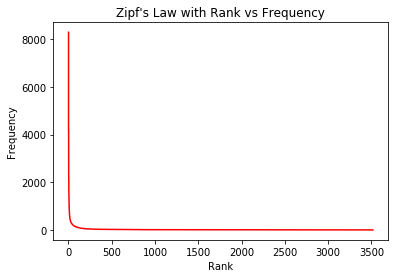

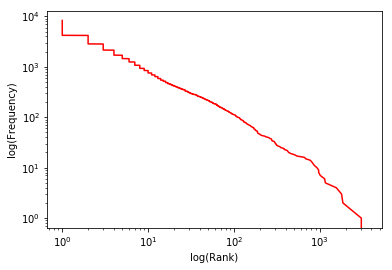

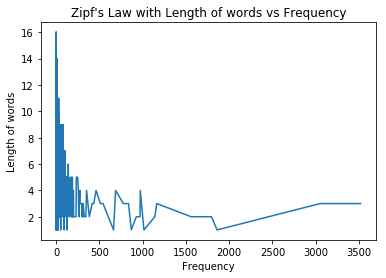

In [25]:
#ZipfsLaw
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np

frequency={}
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1
fr=[value for key, value in reversed(sorted(frequency.items(), key = itemgetter(1)))]
rank = [i for i in range(0,len(frequency))]
plt.plot(fr,rank,'r')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law with Rank vs Frequency')
plt.show()
print("\n\n")

plt.loglog(fr,rank,'r')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.show()
print("\n\n")

ln=[len(key) for key, value in reversed(sorted(frequency.items(), key = itemgetter(1)))]
plt.plot(fr,ln)
plt.xlabel('Frequency')
plt.ylabel('Length of words')
plt.title('Zipf\'s Law with Length of words vs Frequency')
plt.show()

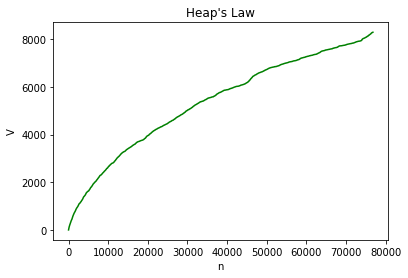

β = 0.6205281566767129
K = 8.138300315592787


In [26]:
#HeapsLaw
n=[]
V=[]
i=0
u_w=set() #UniqueWords
for wd in words:
    u_w.add(wd) #NumberOfTypes
    i += 1  #NumberOfTokens
    n.append(i)
    V.append(len(u_w))
plt.plot(n,V,'g')
plt.xlabel('n')
plt.ylabel("V")
plt.title('Heap\'s Law')
plt.show()

lx=np.log(n);
ly=np.log(V);
s,i= np.polyfit(lx, ly, 1);
print("β =",s)
print("K =",np.e**i)

K and β’s values are corpus-dependent.
• 0 < β < 1: the vocabulary size increases as the corpus grows larger, but by a slower and slower rate.